##Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import boxcox
from scipy.special import inv_boxcox

## Data gathering

In [2]:
file_path = '/content/Cellphone.csv'
data = pd.read_csv(file_path)
data

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


In [3]:
# checking data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [4]:
# checkimg for null values
data.isnull().sum()

,0
Product_id,0
Price,0
Sale,0
weight,0
resoloution,0
ppi,0
cpu core,0
cpu freq,0
internal mem,0
ram,0


### **Data preprocessing**

In [5]:
# removing unwanted columns
df = data.copy()
df.drop('Product_id', axis=1, inplace=True)
df.head()

,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [6]:
# renaming column names
df.rename(columns = {'Price': 'price', 'Sale': 'sale','resoloution': 'resolution', 'ppi': 'phone_pixel_density', 'cpu core': 'cpu_core',
                     'cpu freq': 'cpu_freq', 'internal mem': 'int_memory', 'RearCam': 'rear_cam', 'Front_Cam': 'front_cam',}, inplace = True)

In [7]:
df.columns

Index(['price', 'sale', 'weight', 'resolution', 'phone_pixel_density',
       'cpu_core', 'cpu_freq', 'int_memory', 'ram', 'rear_cam', 'front_cam',
       'battery', 'thickness'],
      dtype='object')

### Fetching relationship between columns

In [8]:
df_corr = df.corr()
df_corr

,price,sale,weight,resolution,phone_pixel_density,cpu_core,cpu_freq,int_memory,ram,rear_cam,front_cam,battery,thickness
price,1.000000,0.273263,0.144555,0.404010,0.817614,0.686811,0.727383,0.776738,0.896915,0.739538,0.675286,0.559946,-0.716773
sale,0.273263,1.000000,0.016114,0.017154,0.235896,0.069517,0.099133,0.489308,0.373127,0.292164,0.437233,0.120338,-0.047991
weight,0.144555,0.016114,1.000000,0.890416,-0.054683,0.216257,0.222730,0.098849,0.149283,-0.029448,-0.005971,0.833783,-0.185262
resolution,0.404010,0.017154,0.890416,1.000000,0.181292,0.472226,0.505454,0.202660,0.327216,0.249892,0.202720,0.843462,-0.533708
phone_pixel_density,0.817614,0.235896,-0.054683,0.181292,1.000000,0.487990,0.713168,0.618560,0.748724,0.774008,0.491371,0.302517,-0.496791
cpu_core,0.686811,0.069517,0.216257,0.472226,0.487990,1.000000,0.491519,0.276251,0.483128,0.611353,0.586698,0.459728,-0.697935
cpu_freq,0.727383,0.099133,0.222730,0.505454,0.713168,0.491519,1.000000,0.441400,0.633547,0.625104,0.358319,0.473137,-0.614458
int_memory,0.776738,0.489308,0.098849,0.202660,0.618560,0.276251,0.441400,1.000000,0.875354,0.451917,0.555733,0.461506,-0.367412
ram,0.896915,0.373127,0.149283,0.327216,0.748724,0.483128,0.633547,0.875354,1.000000,0.648073,0.647470,0.541001,-0.521074
rear_cam,0.739538,0.292164,-0.029448,0.249892,0.774008,0.611353,0.625104,0.451917,0.648073,1.000000,0.596374,0.287821,-0.550998


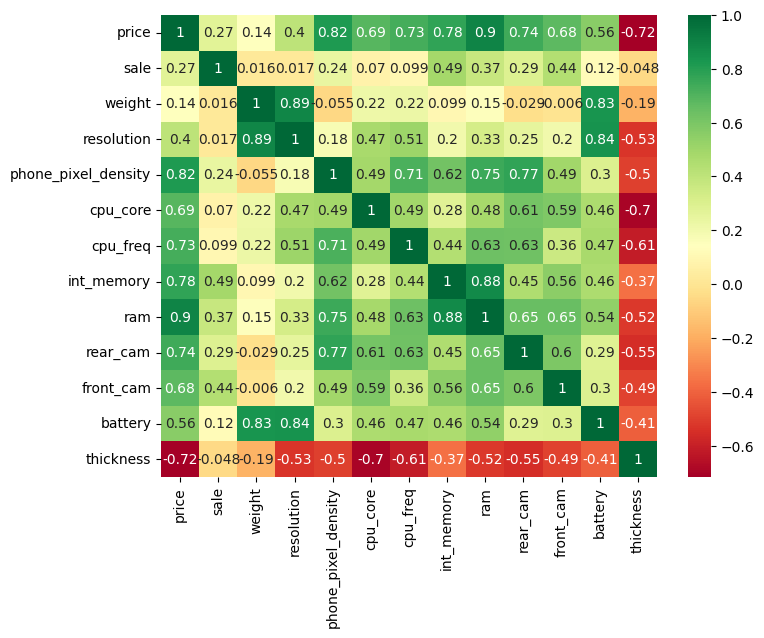

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df_corr, annot = True, cmap = 'RdYlGn')
plt.show()

In [10]:
df_corr.price

,price
price,1.000000
sale,0.273263
weight,0.144555
resolution,0.404010
phone_pixel_density,0.817614
cpu_core,0.686811
cpu_freq,0.727383
int_memory,0.776738
ram,0.896915
rear_cam,0.739538


In [11]:
# selecting columns based on correlation threshold value
corr_thres = 0.5
df_corr_price = df_corr['price'][abs(df_corr['price']) > corr_thres]
df_corr_price

,price
price,1.000000
phone_pixel_density,0.817614
cpu_core,0.686811
cpu_freq,0.727383
int_memory,0.776738
ram,0.896915
rear_cam,0.739538
front_cam,0.675286
battery,0.559946
thickness,-0.716773


In [12]:
df[df_corr_price.index].describe()

,price,phone_pixel_density,cpu_core,cpu_freq,int_memory,ram,rear_cam,front_cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,2215.596273,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,768.187171,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,614.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,1734.000000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,2258.000000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,2744.000000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,4361.000000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


### Checking the overall distribution of all columns

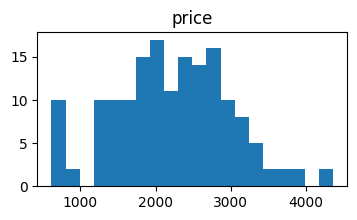

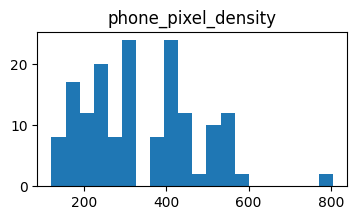

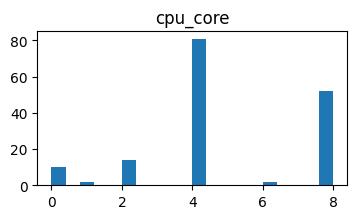

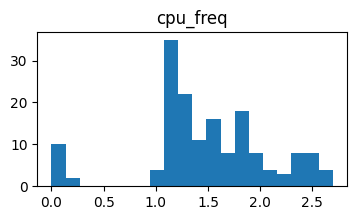

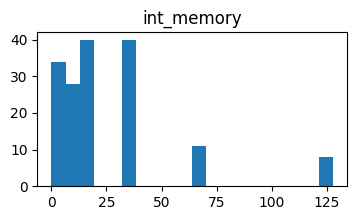

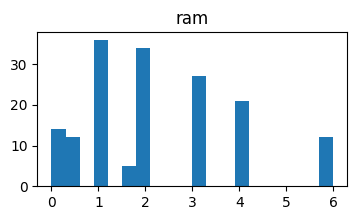

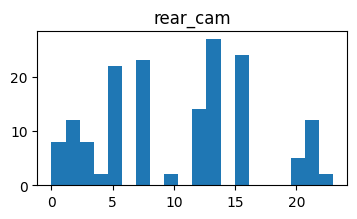

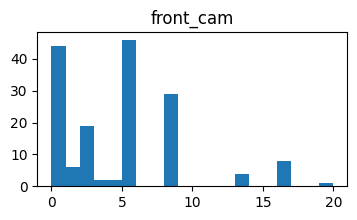

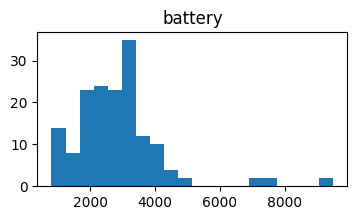

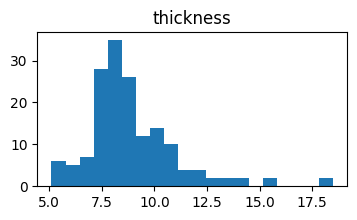

In [13]:
for col in df_corr_price.index:
  plt.figure(figsize = (4,2))
  plt.hist(df[col], bins = 20)
  plt.title(col)
  plt.show()

Most of the features in the dataset are either skewed or sparse, as evident from the output of the describe() method, where some features exhibit extremely high standard deviations.

To address this, we can apply transformation techniques to normalize or stabilize the distribution of these features. In this case, I used log transformation for most features and square root transformation for columns containing zero values to ensure meaningful adjustments.

In [14]:
df_corr_price.index

Index(['price', 'phone_pixel_density', 'cpu_core', 'cpu_freq', 'int_memory',
       'ram', 'rear_cam', 'front_cam', 'battery', 'thickness'],
      dtype='object')

In [15]:
# splitting dataset into features and target variables
y = 'price'
Y = df[y].copy()
X = df[df_corr_price.index[1:]].copy()

In [16]:
Y.head()

,price
0,2357
1,1749
2,1916
3,1315
4,1749


In [17]:
X.describe()

,phone_pixel_density,cpu_core,cpu_freq,int_memory,ram,rear_cam,front_cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


In [18]:
battery_log = np.log(X['battery'])

In [19]:
ppi_log = np.log(X['phone_pixel_density'])

In [20]:
thickness_log = np.log(X['thickness'])

In [21]:
int_memory_sqrt = np.sqrt(X['int_memory'])

In [22]:
rear_cam_sqrt = np.sqrt(X['rear_cam'])

In [23]:
front_cam_sqrt = np.sqrt(X['front_cam'])

In [24]:
X_new = pd.DataFrame({'battery_log': battery_log, 'ppi_log': ppi_log,
                      'thickness': thickness_log, 'cpu_core': X['cpu_core'],
                      'cpu_freq': X['cpu_freq'], 'int_memory': int_memory_sqrt,
                      'ram': X['ram'], 'rear_cam_sqrt': rear_cam_sqrt,
                      'front_cam_sqrt': front_cam_sqrt})

### Data modelling

In [25]:
y_bc, y_lam = boxcox(Y)

In [26]:
s = StandardScaler()
poly = PolynomialFeatures(degree = 2)
lr = LinearRegression()

In [27]:
X_new.shape

(161, 9)

In [28]:
x_poly = poly.fit_transform(X_new)
x_std = s.fit_transform(x_poly)
x_std.shape

(161, 55)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x_std, y_bc, test_size = 0.2, random_state = 42)

In [30]:
model = lr.fit(x_train, y_train)
y_test_pred = model.predict(x_test)

In [32]:
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(r2_test)
print(mse_test)

0.9374530122201289
9525.764050671696


In [34]:
y_train_pred = model.predict(x_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
print(r2_train)
print(mse_train)

0.9847699035296582
2456.3587657355597


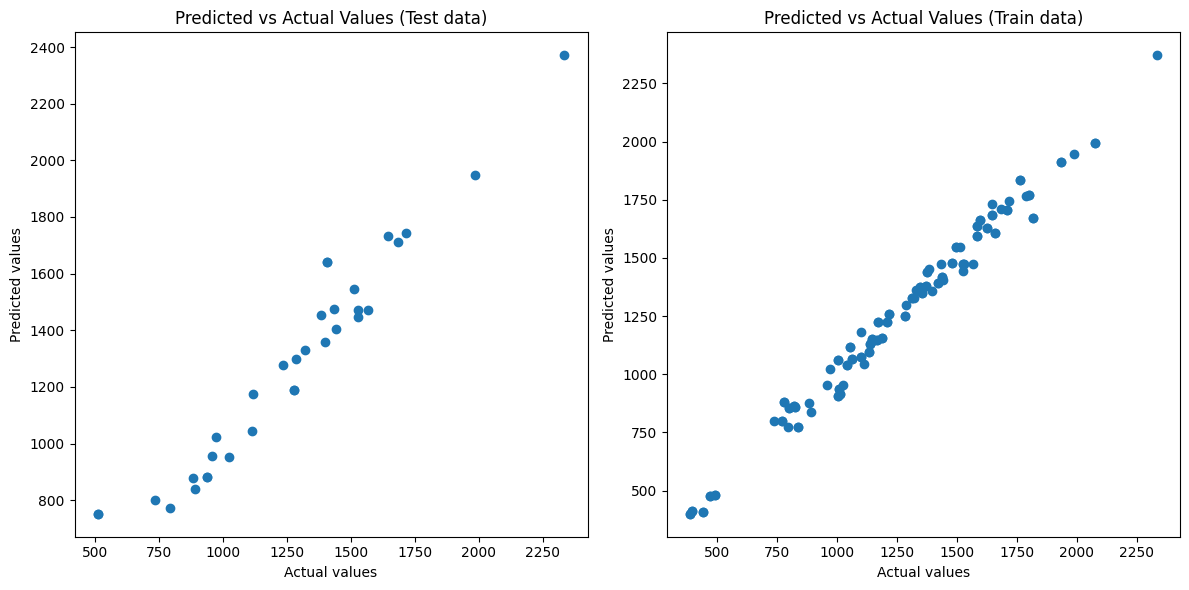

In [36]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
plt.plot(y_test, y_test_pred, 'o')
plt.title('Predicted vs Actual Values (Test data)')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.subplot(1,2,2)
plt.plot(y_train, y_train_pred, 'o')
plt.title('Predicted vs Actual Values (Train data)')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.tight_layout()
plt.show()

In [37]:
rmse_train = np.sqrt(mse_train)
rmse_train

49.5616662929684

In [38]:
rmse_test = np.sqrt(mse_test)
rmse_test

97.60002075138968

In [39]:
y_test_org = inv_boxcox(y_test_pred, y_lam)

The results indicate that the predicted values closely match the actual values in both the training and test datasets. This is evident from the visualizations, which highlight the model's ability to capture the relationship between the features and the target variable with high accuracy.

However, it is important to note that the linear regression model has been trained on a relatively small dataset. While the current performance appears satisfactory, training the model on a larger dataset would likely improve its accuracy and generalizability. Expanding the dataset would provide the model with a more diverse range of patterns, reducing potential overfitting and enhancing its ability to make reliable predictions on new data.